<a href="https://colab.research.google.com/github/hidayetyakupoglu/Anomaly-Detection/blob/master/windy10_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.4.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


from numpy.random import seed
import tensorflow as tf
#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [503]:
#scada = pd.read_csv('Turbine6.csv', parse_dates=['Timestamp'])
scada2=pd.read_excel('T07_2017.xlsx')

In [502]:
scada1=pd.read_excel('T07_2016.xlsx')

In [504]:
faults2= pd.read_excel('wind_failures_2017.xlsx', parse_dates=['Timestamp'])
faults1= pd.read_excel('wind_failures_2016.xlsx', parse_dates=['Timestamp'])

In [505]:
scada1

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T07,2016-01-08T23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46,73,72,71,...,-1000.0,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1
1,T07,2016-04-19T12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67,123,122,117,...,-769.9,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1
2,T07,2016-04-19T13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66,115,113,111,...,-949.2,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1
3,T07,2016-04-19T15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45,64,64,64,...,-930.1,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6
4,T07,2016-01-09T01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51,91,89,86,...,-974.5,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52440,T07,2016-10-28T11:00:00+00:00,1695.8,1299.3,1530.1,121.4,59,93,92,91,...,-990.3,-583.3,-1000.0,53.7,963.9,1000.0,406.1,114.1,58,99.9
52441,T07,2016-10-22T09:00:00+00:00,1392.4,1226.7,1263.7,23.8,43,63,63,63,...,-776.9,-289.3,-1000.0,198.0,776.9,1000.0,289.3,198.0,40,170.0
52442,T07,2016-10-22T09:20:00+00:00,1511.8,1221.0,1290.4,57.7,43,63,63,63,...,-916.8,-346.7,-1000.0,145.2,916.8,1000.0,346.7,145.2,40,169.6
52443,T07,2016-10-22T10:00:00+00:00,1600.3,1259.0,1385.8,77.8,43,64,64,63,...,-999.5,-733.2,-1000.0,9.4,999.5,1000.0,733.2,9.4,40,170.7


In [506]:
scada2

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T07,2017-12-29T20:40:00+00:00,1255.5,1239.3,1248.8,2.9,39.0,63,63,63,...,-143.2,-5.7,-310.4,55.3,143.2,310.4,5.7,55.3,36,290.9
1,T07,2017-12-29T21:50:00+00:00,1253.6,211.8,819.4,499.1,38.0,57,58,57,...,-87.4,0.0,-623.0,165.1,87.4,623.0,0.0,165.1,34,326.6
2,T07,2017-12-29T23:20:00+00:00,1259.1,1233.3,1249.5,3.4,36.0,59,59,59,...,-707.5,-339.2,-1000.0,203.7,707.5,1000.0,339.2,203.7,34,327.0
3,T07,2017-12-30T00:10:00+00:00,1269.0,1233.8,1250.0,5.4,37.0,61,61,61,...,-478.7,-244.6,-1000.0,138.4,478.7,1000.0,244.6,138.4,34,335.1
4,T07,2017-12-30T00:20:00+00:00,1334.9,1218.3,1254.0,18.1,37.0,61,61,61,...,-820.0,-179.6,-1000.0,211.7,820.0,1000.0,179.6,211.7,34,335.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52289,T07,2017-05-31T08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,...,-891.5,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1
52290,T07,2017-02-15T16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,...,-584.7,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5
52291,T07,2017-05-31T09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,...,-1000.0,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1
52292,T07,2017-02-15T17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,...,-904.7,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1


In [507]:
scada = pd.concat([scada1, scada2], ignore_index=True)

In [508]:
scada

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T07,2016-01-08T23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,...,-1000.0,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1
1,T07,2016-04-19T12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,...,-769.9,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1
2,T07,2016-04-19T13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,...,-949.2,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1
3,T07,2016-04-19T15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,...,-930.1,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6
4,T07,2016-01-09T01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,...,-974.5,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,T07,2017-05-31T08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,...,-891.5,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1
104735,T07,2017-02-15T16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,...,-584.7,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5
104736,T07,2017-05-31T09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,...,-1000.0,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1
104737,T07,2017-02-15T17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,...,-904.7,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1


In [509]:
faults = pd.concat([faults1, faults2], ignore_index=True)

In [510]:
#  T06 a ait olanlar için yeni df oluştur
df1 = faults[faults['Turbine_ID'] == 'T07']
df1

,Turbine_ID,Component,Timestamp,Remarks
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
8,T07,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer
9,T07,TRANSFORMER,2016-08-23 02:21:00+00:00,High temperature transformer. Transformer refr...
19,T07,GENERATOR_BEARING,2017-08-20 06:08:00+00:00,Generator bearings damaged
20,T07,GENERATOR,2017-08-21 14:47:00+00:00,Generator damaged
21,T07,HYDRAULIC_GROUP,2017-06-17 11:35:00+00:00,Oil leakage in Hub
22,T07,HYDRAULIC_GROUP,2017-10-19 10:11:00+00:00,Oil leakage in Hub


In [291]:
#scada = scada[scada['Turbine_ID'] == 'T11']

In [511]:
# prompt: df_T06 daki Timestamp dakikalarını 10'un katı olacak şekilde aşağı yuvarla

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'].dt.floor('10min'))
df1

,Turbine_ID,Component,Timestamp,Remarks
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
8,T07,TRANSFORMER,2016-07-10 03:40:00+00:00,High temperature transformer
9,T07,TRANSFORMER,2016-08-23 02:20:00+00:00,High temperature transformer. Transformer refr...
19,T07,GENERATOR_BEARING,2017-08-20 06:00:00+00:00,Generator bearings damaged
20,T07,GENERATOR,2017-08-21 14:40:00+00:00,Generator damaged
21,T07,HYDRAULIC_GROUP,2017-06-17 11:30:00+00:00,Oil leakage in Hub
22,T07,HYDRAULIC_GROUP,2017-10-19 10:10:00+00:00,Oil leakage in Hub


In [ ]:
# prompt: set index timestamp

#df_T06 = df_T06.set_index('Timestamp')


In [512]:
scada['Timestamp'] = pd.to_datetime(scada['Timestamp'])

In [513]:
scada


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T07,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,...,-1000.0,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1
1,T07,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,...,-769.9,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1
2,T07,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,...,-949.2,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1
3,T07,2016-04-19 15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,...,-930.1,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6
4,T07,2016-01-09 01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,...,-974.5,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,T07,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,...,-891.5,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1
104735,T07,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,...,-584.7,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5
104736,T07,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,...,-1000.0,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1
104737,T07,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,...,-904.7,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1


In [514]:
# prompt: df_T06 ile scada yı aynı endekte birleştir

df2 = pd.merge(scada,df1,how='left')


In [515]:
df2

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Component,Remarks
0,T07,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,...,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1,NaN,NaN
1,T07,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,...,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1,NaN,NaN
2,T07,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,...,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1,NaN,NaN
3,T07,2016-04-19 15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,...,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6,NaN,NaN
4,T07,2016-01-09 01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,...,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,T07,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,...,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1,NaN,NaN
104735,T07,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,...,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5,NaN,NaN
104736,T07,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,...,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1,NaN,NaN
104737,T07,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,...,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1,NaN,NaN


In [517]:
df2[df2['Component'] =='GENERATOR_BEARING']

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Component,Remarks
26333,T07,2016-04-30 12:40:00+00:00,17.6,0.0,2.9,4.8,204.0,35,35,34,...,0.0,0.0,0.0,0.0,0.0,0.0,32,100.5,GENERATOR_BEARING,High temperature in generator bearing (replace...
87299,T07,2017-08-20 06:00:00+00:00,1877.1,0.0,1421.7,600.2,74.0,120,120,116,...,-1000.0,307.2,407.5,994.2,0.0,214.3,87,92.2,GENERATOR_BEARING,Generator bearings damaged


In [518]:
df=df2

In [519]:
# prompt:  Unnamed: 0, Turbine_ID_x, Turbine_ID_y	 ve Remarks sütunlarını çıkart

df = df.drop(columns=['Turbine_ID','Remarks'])


In [520]:
df = df.rename(columns={'Component':'fault'})

In [521]:
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,30,...,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1,NaN
1,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,47,...,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1,NaN
2,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,44,...,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1,NaN
3,2016-04-19 15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,47,...,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6,NaN
4,2016-01-09 01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,33,...,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,41,...,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1,NaN
104735,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,48,...,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5,NaN
104736,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,47,...,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1,NaN
104737,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,49,...,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1,NaN


In [522]:
# prompt: fault sütununda NaN değerleri yerine NF yaz

df['fault'] = df['fault'].fillna('NF')
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,30,...,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1,NF
1,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,47,...,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1,NF
2,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,44,...,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1,NF
3,2016-04-19 15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,47,...,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6,NF
4,2016-01-09 01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,33,...,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,41,...,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1,NF
104735,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,48,...,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5,NF
104736,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,47,...,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1,NF
104737,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,49,...,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1,NF


In [523]:
# prompt: fault sütununda NF olmayanları göster

df[df['fault'] !='NF']


,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
26333,2016-04-30 12:40:00+00:00,17.6,0.0,2.9,4.8,204.0,35,35,34,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,100.5,GENERATOR_BEARING
26868,2016-08-23 02:20:00+00:00,1753.0,1597.2,1672.4,23.5,64.0,113,111,107,42,...,-583.3,-1000.0,183.9,528.3,1000.0,406.1,161.1,75,99.5,TRANSFORMER
42566,2016-07-10 03:40:00+00:00,1746.2,1641.2,1680.9,18.2,79.0,137,136,131,46,...,-583.3,-621.1,0.9,406.1,425.9,406.1,0.5,80,83.4,TRANSFORMER
58478,2017-06-17 11:30:00+00:00,53.0,0.0,13.9,11.1,34.0,34,34,34,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,122.3,HYDRAULIC_GROUP
76816,2017-08-21 14:40:00+00:00,88.6,0.0,33.5,15.2,32.0,33,33,33,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,113.2,GENERATOR
87299,2017-08-20 06:00:00+00:00,1877.1,0.0,1421.7,600.2,74.0,120,120,116,50,...,0.0,-1000.0,307.2,407.5,994.2,0.0,214.3,87,92.2,GENERATOR_BEARING
92121,2017-10-19 10:10:00+00:00,8.4,0.0,0.3,1.5,44.0,60,59,59,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,308.5,HYDRAULIC_GROUP


In [524]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [525]:
# prompt: df'de 2016-07-11 19:48:00+00:00	Timestampı göster

df[df['Timestamp'] == '2016-03-03 19:00:00+00:00']


,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
44971,2016-03-03 19:00:00+00:00,1277.1,1231.5,1250.9,8.4,40.0,60,61,60,30,...,-28.7,-784.9,178.6,294.7,784.9,28.7,178.6,45,261.4,NF


In [526]:
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,30,...,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1,NF
1,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,47,...,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1,NF
2,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,44,...,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1,NF
3,2016-04-19 15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,47,...,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6,NF
4,2016-01-09 01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,33,...,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,41,...,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1,NF
104735,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,48,...,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5,NF
104736,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,47,...,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1,NF
104737,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,49,...,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1,NF


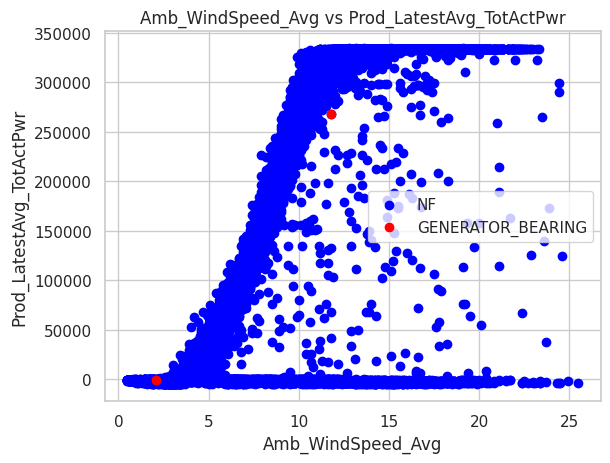

In [527]:
# prompt: df için Amb_WindSpeed_Max ile Prod_LatestAvg_TotActPwr grafiğini çiz, fault sütunu NF olanları mavi, HYDRAULIC_GROUP isimlileri kırmızı renkle göster

import matplotlib.pyplot as plt

# Filter the data based on the fault column
nf_data = df[df['fault'] == 'NF']
hydraulic_data = df[df['fault'] == 'GENERATOR_BEARING']

# Plot the data points
plt.scatter(nf_data['Amb_WindSpeed_Avg'], nf_data['Prod_LatestAvg_TotActPwr'], color='blue', label='NF')
plt.scatter(hydraulic_data['Amb_WindSpeed_Avg'], hydraulic_data['Prod_LatestAvg_TotActPwr'], color='red', label='GENERATOR_BEARING')

# Add labels and title
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Prod_LatestAvg_TotActPwr')
plt.title('Amb_WindSpeed_Avg vs Prod_LatestAvg_TotActPwr')

# Add legend and show plot
plt.legend()
plt.show()


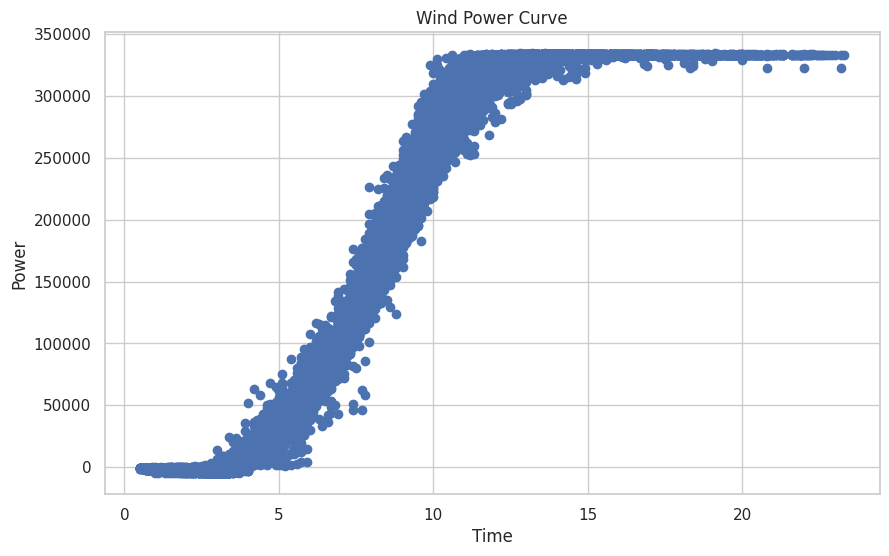

In [819]:
con0 = (nf_data['Amb_WindSpeed_Avg'] > 8) & (nf_data['Prod_LatestAvg_TotActPwr'] < 120000)
con7 = (nf_data['Amb_WindSpeed_Avg'] > 9) & (nf_data['Prod_LatestAvg_TotActPwr'] < 180000)

con1 = (nf_data['Amb_WindSpeed_Avg'] > 10) & (nf_data['Prod_LatestAvg_TotActPwr'] < 230000)
con10 = (nf_data['Amb_WindSpeed_Avg'] > 11) & (nf_data['Prod_LatestAvg_TotActPwr'] < 250000)

con2 = (nf_data['Amb_WindSpeed_Avg'] > 14) & (nf_data['Prod_LatestAvg_TotActPwr'] < 260000)

# İkinci koşul: Rüzgar hızı 8'den büyük ve güç 600'den düşükse


con3 = (nf_data['Amb_WindSpeed_Avg'] > 15) & (nf_data['Prod_LatestAvg_TotActPwr'] < 320000)
con4 = (nf_data['Amb_WindSpeed_Avg'] > 13) & (nf_data['Prod_LatestAvg_TotActPwr'] < 310000)

con5 = (nf_data['Amb_WindSpeed_Avg'] > 7) & (nf_data['Prod_LatestAvg_TotActPwr'] < 45000)
con8 = (nf_data['Amb_WindSpeed_Avg'] > 4) & (nf_data['Prod_LatestAvg_TotActPwr'] < 1000)
con9 = (nf_data['Amb_WindSpeed_Avg'] > 6) & (nf_data['Prod_LatestAvg_TotActPwr'] < 30000)

con6 = (nf_data['Amb_WindSpeed_Avg'] > 25) & (nf_data['Prod_LatestAvg_TotActPwr'] > 300000)

# İki koşulu birleştirip uygun olan satırları seçelim
mask = con0 | con1| con2| con3| con4| con5| con6| con7| con8| con9| con10

# Maskeye uyan satırları DataFrame'den çıkaralım
dfson = nf_data[~mask]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(dfson['Amb_WindSpeed_Avg'], dfson['Prod_LatestAvg_TotActPwr'],'o')  # Adjust column names as needed
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)


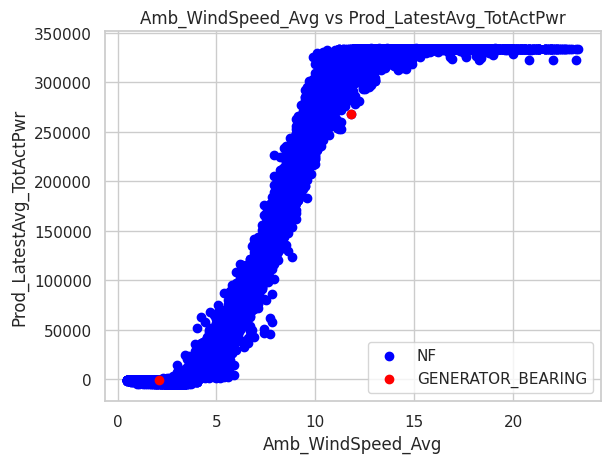

In [820]:
# Plot the data points
plt.scatter(dfson['Amb_WindSpeed_Avg'], dfson['Prod_LatestAvg_TotActPwr'], color='blue', label='NF')
plt.scatter(hydraulic_data['Amb_WindSpeed_Avg'], hydraulic_data['Prod_LatestAvg_TotActPwr'], color='red', label='GENERATOR_BEARING')

# Add labels and title
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Prod_LatestAvg_TotActPwr')
plt.title('Amb_WindSpeed_Avg vs Prod_LatestAvg_TotActPwr')

# Add legend and show plot
plt.legend()
plt.show()

In [821]:
dfson

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,30,...,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1,NF
1,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,47,...,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1,NF
2,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,44,...,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1,NF
3,2016-04-19 15:30:00+00:00,1419.0,1224.8,1282.4,32.3,45.0,64,64,64,47,...,-454.8,-1000.0,144.1,930.1,1000.0,454.8,144.1,43,114.6,NF
4,2016-01-09 01:40:00+00:00,1709.2,1596.5,1649.0,18.6,51.0,91,89,86,33,...,-583.3,-1000.0,87.5,897.8,1000.0,406.1,166.7,52,220.8,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104734,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,41,...,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1,NF
104735,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,48,...,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5,NF
104736,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,47,...,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1,NF
104737,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,49,...,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1,NF


In [966]:
# prompt: hydraulic_data ile dfson birleştir

dff= pd.merge(hydraulic_data, dfson, how='outer')


In [967]:
dff

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-04-30 12:40:00+00:00,17.6,0.0,2.9,4.8,204.0,35,35,34,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,100.5,GENERATOR_BEARING
1,2017-08-20 06:00:00+00:00,1877.1,0.0,1421.7,600.2,74.0,120,120,116,50,...,0.0,-1000.0,307.2,407.5,994.2,0.0,214.3,87,92.2,GENERATOR_BEARING
2,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,30,...,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1,NF
3,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,47,...,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1,NF
4,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,44,...,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101391,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,41,...,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1,NF
101392,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,48,...,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5,NF
101393,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,47,...,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1,NF
101394,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,49,...,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1,NF


In [938]:
dff[dff['fault'] !='NF']

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-04-30 12:40:00+00:00,17.6,0.0,2.9,4.8,204.0,35,35,34,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,100.5,GENERATOR_BEARING
1,2017-08-20 06:00:00+00:00,1877.1,0.0,1421.7,600.2,74.0,120,120,116,50,...,0.0,-1000.0,307.2,407.5,994.2,0.0,214.3,87,92.2,GENERATOR_BEARING


In [939]:
perc=0.4  # test oranı orn:0.3 ise %70 train %30 testtir
fau='GENERATOR_BEARING'    # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'GENERATOR_BEARING'

In [940]:
data = dff[dff['fault'].isin([fau,'NF'])]

In [965]:
# prompt: 2016-04-30 tarihindeki verilerden ['Gen_Bear_Temp_Avg'] ve dff['Gen_Bear2_Temp_Avg'] sütun değerlerini göster

data2016 = data[data['Timestamp'] <= '2016-04-30 12:40:00+00:00'].sort_values(by='Timestamp', ascending=True)
datafilter = data2016[data2016['Timestamp'] >= '2016-04-28 00:00:00+00:00'].sort_values(by='Timestamp', ascending=True)
datafilter[['Gen_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg']]


,Gen_Bear_Temp_Avg,Gen_Bear2_Temp_Avg
44201,31.0,28
44202,30.0,28
6747,30.0,28
19529,30.0,28
40053,29.0,28
...,...,...
12568,32.0,32
1115,32.0,32
25388,32.0,32
15230,85.0,32


In [912]:
data[data.fault!='NF']

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
0,2016-04-30 12:40:00+00:00,17.6,0.0,2.9,4.8,204.0,35,35,34,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,100.5,GENERATOR_BEARING
1,2017-08-20 06:00:00+00:00,1877.1,0.0,1421.7,600.2,74.0,120,120,116,50,...,0.0,-1000.0,307.2,407.5,994.2,0.0,214.3,87,92.2,GENERATOR_BEARING


In [976]:
datan=data.drop(columns=['fault'])
datan

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,2016-04-30 12:40:00+00:00,17.6,0.0,2.9,4.8,204.0,35,35,34,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,100.5
1,2017-08-20 06:00:00+00:00,1877.1,0.0,1421.7,600.2,74.0,120,120,116,50,...,-593.8,0.0,-1000.0,307.2,407.5,994.2,0.0,214.3,87,92.2
2,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46.0,73,72,71,30,...,-1000.0,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1
3,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67.0,123,122,117,47,...,-769.9,-583.3,-1000.0,194.6,587.4,1000.0,406.1,219.4,65,126.1
4,2016-04-19 13:00:00+00:00,1729.8,1307.5,1598.2,73.4,66.0,115,113,111,44,...,-949.2,-583.3,-1000.0,126.5,882.6,1000.0,406.1,205.8,64,126.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100537,2017-05-31 08:30:00+00:00,1771.8,1480.0,1640.1,49.1,62.0,102,101,99,41,...,-891.5,-583.3,-1000.0,170.5,803.8,1000.0,406.1,257.8,69,84.1
100538,2017-02-15 16:10:00+00:00,1762.5,1593.5,1680.1,26.0,71.0,129,127,123,48,...,-584.7,-583.3,-1000.0,21.9,406.9,699.0,406.1,12.7,70,98.5
100539,2017-05-31 09:40:00+00:00,1690.7,1511.8,1652.4,28.8,68.0,113,112,109,47,...,-1000.0,-1000.0,-1000.0,0.0,958.8,1000.0,696.8,65.1,78,84.1
100540,2017-02-15 17:20:00+00:00,1739.0,1573.3,1654.3,25.2,70.0,123,121,118,49,...,-904.7,-583.3,-1000.0,165.9,761.1,1000.0,406.1,225.4,69,118.1


In [981]:
# prompt:  Gen_Bear_Temp_Avg ile korelasyonu 0.5 değerinden yüksek sütunları belirle

import pandas as pd

# Calculate the correlation matrix
corr_matrix = datan.corr()

# Select the columns that have a correlation greater than 0.5 with 'Gen_Bear_Temp_Avg'
corr_columns = corr_matrix['Gen_Bear_Temp_Avg'].loc[lambda x: x > 0.8].index.tolist()

# Print the selected columns
corr_columns



['Gen_Bear_Temp_Avg',
 'Gen_Phase1_Temp_Avg',
 'Gen_Phase2_Temp_Avg',
 'Gen_Phase3_Temp_Avg',
 'Gear_Bear_Temp_Avg',
 'Amb_WindSpeed_Avg',
 'Prod_LatestAvg_ActPwrGen1',
 'Prod_LatestAvg_TotActPwr',
 'HVTrafo_Phase2_Temp_Avg',
 'HVTrafo_Phase3_Temp_Avg',
 'Grd_InverterPhase1_Temp_Avg',
 'Cont_Top_Temp_Avg',
 'Cont_VCP_Temp_Avg',
 'Gen_SlipRing_Temp_Avg',
 'Cont_VCP_ChokcoilTemp_Avg',
 'Grd_RtrInvPhase1_Temp_Avg',
 'Grd_RtrInvPhase2_Temp_Avg',
 'Grd_RtrInvPhase3_Temp_Avg',
 'Cont_VCP_WtrTemp_Avg',
 'Grd_Prod_Pwr_Avg',
 'Grd_Prod_CurPhse1_Avg',
 'Grd_Prod_CurPhse2_Avg',
 'Grd_Prod_CurPhse3_Avg',
 'Grd_Prod_Pwr_Max',
 'Grd_Prod_Pwr_Min',
 'Grd_Busbar_Temp_Avg',
 'Amb_WindSpeed_Est_Avg',
 'Grd_Prod_PsblePwr_Avg',
 'Grd_Prod_PsblePwr_Max',
 'Gen_Bear2_Temp_Avg']

In [1687]:
data_hy=data

#data_hy = data_hy.drop(data_hy[(data_hy['WEC: max. Power'] == 0) & (data_hy.iloc[:, -1] == 'NF')].index)
data_nf = data_hy[data_hy.fault == 'NF'].sample(1000, random_state = 123)

df_f = data_hy[data_hy.fault!='NF']

df_combine = pd.concat((data_nf, df_f), axis=0).reset_index(drop=True)

df_combine
data_hy=df_combine

In [ ]:
df_f

In [1690]:
data_hy=data_hy.set_index('Timestamp')

KeyError: "None of ['Timestamp'] are in the columns"

In [1691]:
data_hy

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-29 01:00:00+00:00,181.8,117.9,145.0,16.8,42.0,48,48,49,37,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,265.0,NF
2016-12-09 11:40:00+00:00,1746.0,1476.8,1643.9,44.6,63.0,107,106,104,46,55,...,-583.3,-1000.0,158.6,802.7,1000.0,406.1,237.2,57,113.2,NF
2017-03-19 03:30:00+00:00,1664.8,1412.5,1585.7,49.7,56.0,93,93,91,36,51,...,-1000.0,-1000.0,0.0,999.9,1000.0,943.7,1.8,50,93.6,NF
2016-02-24 23:30:00+00:00,1547.5,1247.0,1366.0,74.4,45.0,69,69,68,30,55,...,-775.7,-1000.0,13.2,998.8,1000.0,775.7,13.2,47,255.5,NF
2016-04-10 22:10:00+00:00,1635.1,1325.0,1451.3,69.3,42.0,66,66,64,28,52,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,45,236.5,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-15 02:00:00+00:00,1259.8,1237.2,1248.6,3.7,35.0,51,51,51,35,44,...,-22.6,-347.3,75.4,196.4,347.3,22.6,75.4,37,73.2,NF
2016-09-22 23:30:00+00:00,0.0,0.0,0.0,0.0,31.0,35,35,35,49,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,280.4,NF
2016-02-03 03:30:00+00:00,167.4,129.6,148.4,9.5,27.0,34,34,34,31,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,308.1,NF


In [1692]:
# prompt: zaman endeksini sıraya koy

data_hy=data_hy.sort_index()


In [1693]:
data_hy

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fault
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,32,45,...,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3,NF
2016-01-01 13:50:00+00:00,1666.9,1415.1,1577.3,58.4,45.0,69,69,68,32,53,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,46,220.1,NF
2016-01-01 17:00:00+00:00,1671.2,1259.1,1480.3,126.3,45.0,68,68,67,32,55,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,53,234.8,NF
2016-01-01 21:30:00+00:00,1511.1,1227.3,1294.7,52.2,42.0,62,62,62,31,51,...,-363.1,-1000.0,148.4,917.6,1000.0,363.1,148.4,47,234.5,NF
2016-01-02 07:50:00+00:00,5.0,0.0,0.1,0.7,38.0,45,45,45,33,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,306.3,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 20:50:00+00:00,1694.9,1501.3,1662.1,35.9,45.0,80,79,77,33,55,...,-1000.0,-1000.0,0.0,999.7,1000.0,938.6,3.1,42,297.6,NF
2017-12-28 09:50:00+00:00,1702.7,1606.5,1675.3,11.1,43.0,77,77,75,31,59,...,-771.9,-1000.0,12.9,974.1,1000.0,505.1,68.7,41,274.8,NF
2017-12-30 01:50:00+00:00,1264.9,177.2,1061.7,379.1,34.0,50,50,50,31,43,...,0.0,-598.7,187.9,139.4,598.7,0.0,187.9,32,356.7,NF


In [1694]:
data_af=data_hy

In [1695]:
data_afx= data_af.drop(columns=['fault'])
data_afx

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,32,45,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3
2016-01-01 13:50:00+00:00,1666.9,1415.1,1577.3,58.4,45.0,69,69,68,32,53,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,46,220.1
2016-01-01 17:00:00+00:00,1671.2,1259.1,1480.3,126.3,45.0,68,68,67,32,55,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,53,234.8
2016-01-01 21:30:00+00:00,1511.1,1227.3,1294.7,52.2,42.0,62,62,62,31,51,...,-917.6,-363.1,-1000.0,148.4,917.6,1000.0,363.1,148.4,47,234.5
2016-01-02 07:50:00+00:00,5.0,0.0,0.1,0.7,38.0,45,45,45,33,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,306.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 20:50:00+00:00,1694.9,1501.3,1662.1,35.9,45.0,80,79,77,33,55,...,-1000.0,-1000.0,-1000.0,0.0,999.7,1000.0,938.6,3.1,42,297.6
2017-12-28 09:50:00+00:00,1702.7,1606.5,1675.3,11.1,43.0,77,77,75,31,59,...,-999.0,-771.9,-1000.0,12.9,974.1,1000.0,505.1,68.7,41,274.8
2017-12-30 01:50:00+00:00,1264.9,177.2,1061.7,379.1,34.0,50,50,50,31,43,...,-139.4,0.0,-598.7,187.9,139.4,598.7,0.0,187.9,32,356.7


In [1696]:
hdata=data_af['fault'].replace('NF', 0, inplace=True)
hdata=data_af['fault'].replace(fau, 1, inplace=True)

In [1697]:
data_afx= data_af.drop(columns=['fault'])
data_afy=data_af['fault']

In [1698]:
data_afy

Timestamp
2016-01-01 00:00:00+00:00    0
2016-01-01 13:50:00+00:00    0
2016-01-01 17:00:00+00:00    0
2016-01-01 21:30:00+00:00    0
2016-01-02 07:50:00+00:00    0
                            ..
2017-12-27 20:50:00+00:00    0
2017-12-28 09:50:00+00:00    0
2017-12-30 01:50:00+00:00    0
2017-12-30 04:50:00+00:00    0
2017-12-31 10:20:00+00:00    0
Name: fault, Length: 1002, dtype: int64

In [1699]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

In [1700]:
x_new = x_new[['Gen_Bear_Temp_Avg','Gen_RPM_Avg','Gen_Bear2_Temp_Avg','Rtr_RPM_Avg','Gen_Phase1_Temp_Avg',
 'Gen_Phase2_Temp_Avg',
 'Gen_Phase3_Temp_Avg','Amb_WindSpeed_Avg','Prod_LatestAvg_TotActPwr']]

In [1701]:
#x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
 #                             columns = data_afx.columns,
   #                           index = data_afx.index)

In [1702]:
# prompt: 'Gen_RPM_Avg','Gen_Bear_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg','Rtr_RPM_Avg','Amb_WindSpeed_Avg' sütunlarını seç ve x_new oluştur

# x_new = x_new[['Gen_RPM_Avg','Gen_Bear_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg','Rtr_RPM_Avg','Amb_WindSpeed_Avg']]


In [1703]:
x_new['fault']=data_af['fault']

In [1704]:
x_new

,Gen_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Rtr_RPM_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,fault
Timestamp,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.118919,0.745721,0.283582,0.744966,0.330579,0.333333,0.344828,0.214724,0.068796,0
2016-01-01 13:50:00+00:00,0.140541,0.937307,0.388060,0.939597,0.388430,0.391667,0.405172,0.441718,0.442261,0
2016-01-01 17:00:00+00:00,0.140541,0.879665,0.492537,0.879195,0.380165,0.383333,0.396552,0.392638,0.351405,0
2016-01-01 21:30:00+00:00,0.124324,0.769372,0.402985,0.771812,0.330579,0.333333,0.353448,0.288344,0.137920,0
2016-01-02 07:50:00+00:00,0.102703,0.000059,0.223881,0.000000,0.190083,0.191667,0.206897,0.073620,0.009005,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-27 20:50:00+00:00,0.140541,0.987699,0.328358,0.986577,0.479339,0.475000,0.482759,0.472393,0.576793,0
2017-12-28 09:50:00+00:00,0.129730,0.995543,0.313433,0.993289,0.454545,0.458333,0.465517,0.503067,0.640338,0
2017-12-30 01:50:00+00:00,0.081081,0.630913,0.179104,0.630872,0.231405,0.233333,0.250000,0.171779,0.025046,0


In [1705]:
data_af=x_new

In [1706]:
corr_matrixx = data_af.corr()
corr_matrixx['fault'].sort_values(ascending=False)

fault                       1.000000
Gen_Bear_Temp_Avg           0.281874
Gen_Bear2_Temp_Avg          0.050940
Gen_Phase2_Temp_Avg         0.019084
Prod_LatestAvg_TotActPwr    0.018522
Gen_Phase1_Temp_Avg         0.018338
Gen_Phase3_Temp_Avg         0.017649
Amb_WindSpeed_Avg           0.015218
Rtr_RPM_Avg                -0.022262
Gen_RPM_Avg                -0.023265
Name: fault, dtype: float64

In [1707]:
corr_matrixx = data_af.corr()
corr_matrixx

,Gen_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Rtr_RPM_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,fault
Gen_Bear_Temp_Avg,1.000000,0.686240,0.884391,0.684178,0.905822,0.906587,0.908260,0.818700,0.794871,0.281874
Gen_RPM_Avg,0.686240,1.000000,0.751468,0.999312,0.798004,0.800871,0.804583,0.827384,0.714227,-0.023265
Gen_Bear2_Temp_Avg,0.884391,0.751468,1.000000,0.749164,0.920683,0.921993,0.924038,0.848605,0.811120,0.050940
Rtr_RPM_Avg,0.684178,0.999312,0.749164,1.000000,0.795452,0.798338,0.802114,0.824935,0.710344,-0.022262
Gen_Phase1_Temp_Avg,0.905822,0.798004,0.920683,0.795452,1.000000,0.999868,0.999343,0.940254,0.921793,0.018338
Gen_Phase2_Temp_Avg,0.906587,0.800871,0.921993,0.798338,0.999868,1.000000,0.999586,0.939140,0.919163,0.019084
Gen_Phase3_Temp_Avg,0.908260,0.804583,0.924038,0.802114,0.999343,0.999586,1.000000,0.934035,0.910314,0.017649
Amb_WindSpeed_Avg,0.818700,0.827384,0.848605,0.824935,0.940254,0.939140,0.934035,1.000000,0.959500,0.015218
Prod_LatestAvg_TotActPwr,0.794871,0.714227,0.811120,0.710344,0.921793,0.919163,0.910314,0.959500,1.000000,0.018522
fault,0.281874,-0.023265,0.050940,-0.022262,0.018338,0.019084,0.017649,0.015218,0.018522,1.000000


In [1708]:
data_af

,Gen_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Rtr_RPM_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,fault
Timestamp,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.118919,0.745721,0.283582,0.744966,0.330579,0.333333,0.344828,0.214724,0.068796,0
2016-01-01 13:50:00+00:00,0.140541,0.937307,0.388060,0.939597,0.388430,0.391667,0.405172,0.441718,0.442261,0
2016-01-01 17:00:00+00:00,0.140541,0.879665,0.492537,0.879195,0.380165,0.383333,0.396552,0.392638,0.351405,0
2016-01-01 21:30:00+00:00,0.124324,0.769372,0.402985,0.771812,0.330579,0.333333,0.353448,0.288344,0.137920,0
2016-01-02 07:50:00+00:00,0.102703,0.000059,0.223881,0.000000,0.190083,0.191667,0.206897,0.073620,0.009005,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-27 20:50:00+00:00,0.140541,0.987699,0.328358,0.986577,0.479339,0.475000,0.482759,0.472393,0.576793,0
2017-12-28 09:50:00+00:00,0.129730,0.995543,0.313433,0.993289,0.454545,0.458333,0.465517,0.503067,0.640338,0
2017-12-30 01:50:00+00:00,0.081081,0.630913,0.179104,0.630872,0.231405,0.233333,0.250000,0.171779,0.025046,0


In [1709]:
# prompt: Timestamp tarih sırasına koy

data_af = data_af.sort_values(by='Timestamp', ascending=True)
data_af

,Gen_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Rtr_RPM_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,fault
Timestamp,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.118919,0.745721,0.283582,0.744966,0.330579,0.333333,0.344828,0.214724,0.068796,0
2016-01-01 13:50:00+00:00,0.140541,0.937307,0.388060,0.939597,0.388430,0.391667,0.405172,0.441718,0.442261,0
2016-01-01 17:00:00+00:00,0.140541,0.879665,0.492537,0.879195,0.380165,0.383333,0.396552,0.392638,0.351405,0
2016-01-01 21:30:00+00:00,0.124324,0.769372,0.402985,0.771812,0.330579,0.333333,0.353448,0.288344,0.137920,0
2016-01-02 07:50:00+00:00,0.102703,0.000059,0.223881,0.000000,0.190083,0.191667,0.206897,0.073620,0.009005,0
...,...,...,...,...,...,...,...,...,...,...
2017-12-27 20:50:00+00:00,0.140541,0.987699,0.328358,0.986577,0.479339,0.475000,0.482759,0.472393,0.576793,0
2017-12-28 09:50:00+00:00,0.129730,0.995543,0.313433,0.993289,0.454545,0.458333,0.465517,0.503067,0.640338,0
2017-12-30 01:50:00+00:00,0.081081,0.630913,0.179104,0.630872,0.231405,0.233333,0.250000,0.171779,0.025046,0


In [1710]:
last_40percent = round(len(data_af) - len(data_af)*perc)
#trainhy = data_af.iloc[ :last_40percent, :]
#testhy= data_af.iloc[last_40percent: ,:]

trainhy = data_af.loc['2016-01':'2016-12']
testhy = data_af.loc['2017-01':'2017-12']

In [1711]:
sutun=trainhy.shape[1]
sensor_cols = trainhy.iloc[:,0:sutun-1]
broken_rows = trainhy[trainhy['fault']==1]
normal_rows = trainhy[trainhy['fault']==0]
machine_status_col = trainhy['fault']

In [1712]:
broken_rows00 = testhy[testhy['fault']==1]

In [1713]:
sensor_cols = trainhy.iloc[:,0:sutun-1]


In [1714]:
sensor_cols

,Gen_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Rtr_RPM_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr
Timestamp,,,,,,,,,
2016-01-01 00:00:00+00:00,0.118919,0.745721,0.283582,0.744966,0.330579,0.333333,0.344828,0.214724,0.068796
2016-01-01 13:50:00+00:00,0.140541,0.937307,0.388060,0.939597,0.388430,0.391667,0.405172,0.441718,0.442261
2016-01-01 17:00:00+00:00,0.140541,0.879665,0.492537,0.879195,0.380165,0.383333,0.396552,0.392638,0.351405
2016-01-01 21:30:00+00:00,0.124324,0.769372,0.402985,0.771812,0.330579,0.333333,0.353448,0.288344,0.137920
2016-01-02 07:50:00+00:00,0.102703,0.000059,0.223881,0.000000,0.190083,0.191667,0.206897,0.073620,0.009005
...,...,...,...,...,...,...,...,...,...
2016-12-31 05:30:00+00:00,0.145946,0.872237,0.373134,0.872483,0.438017,0.441667,0.456897,0.386503,0.336399
2016-12-31 07:00:00+00:00,0.135135,0.891312,0.358209,0.892617,0.421488,0.425000,0.439655,0.398773,0.363074
2016-12-31 09:20:00+00:00,0.124324,0.869681,0.328358,0.872483,0.396694,0.391667,0.405172,0.380368,0.313166


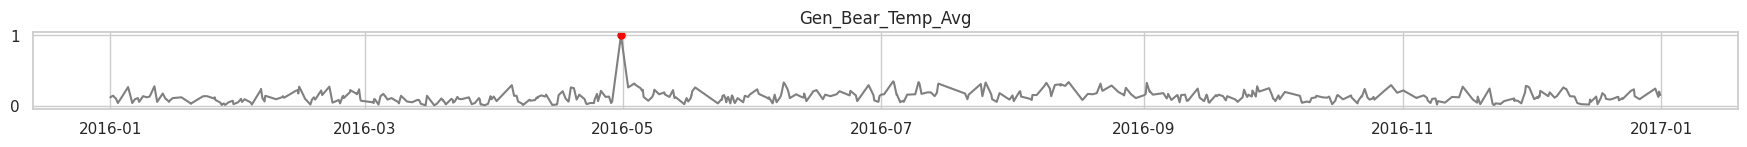

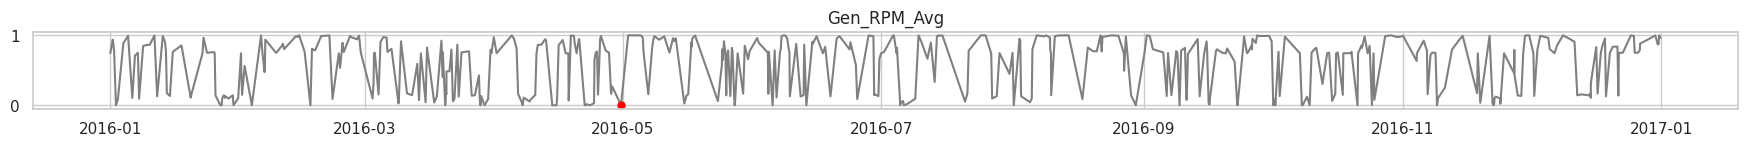

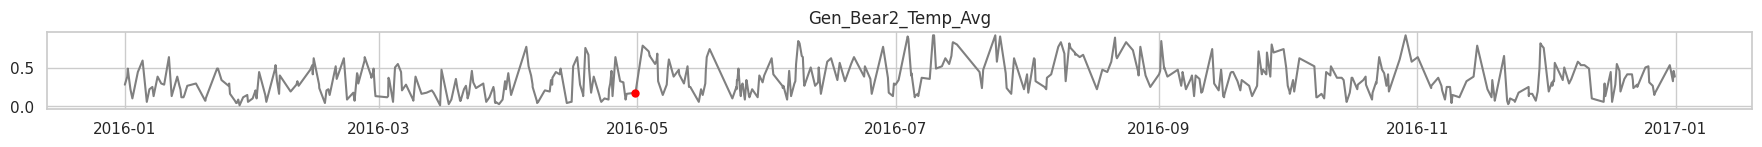

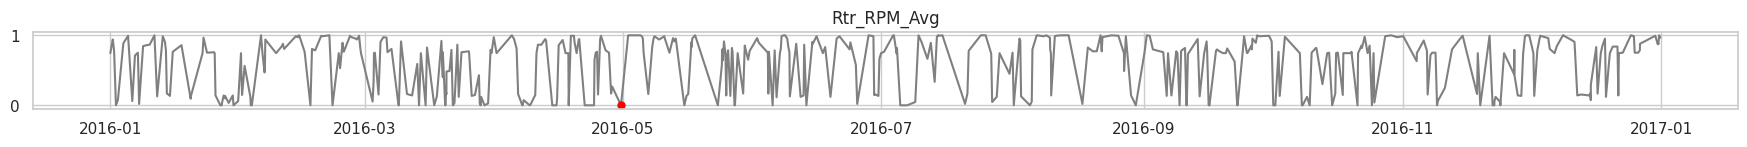

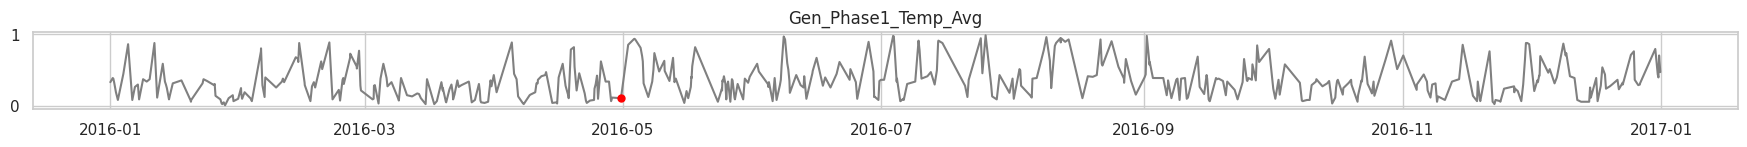

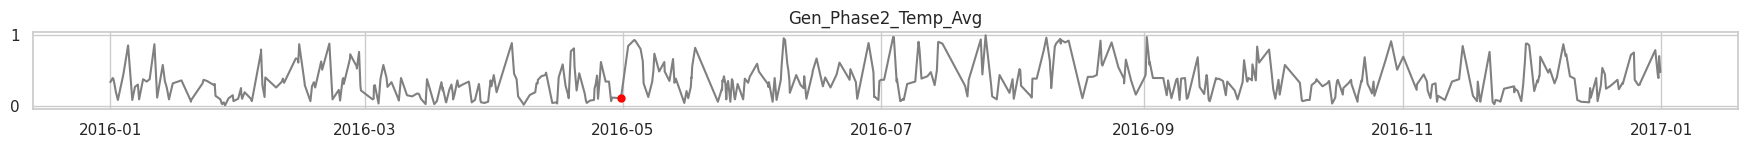

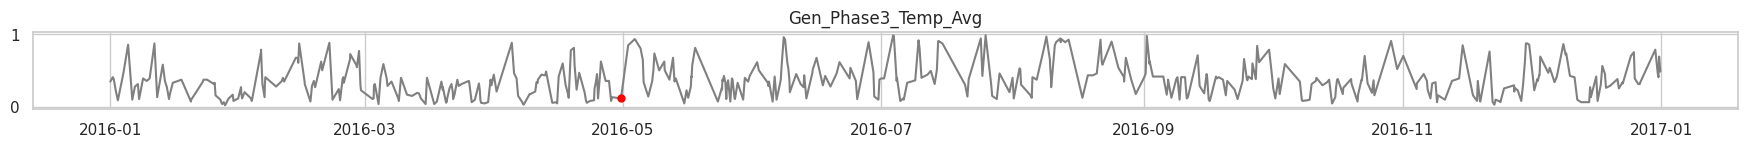

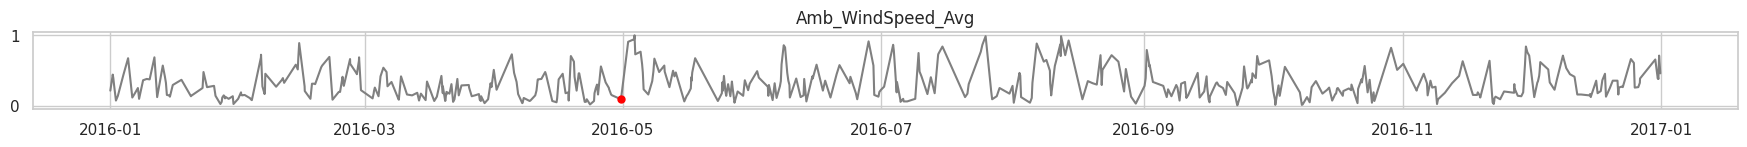

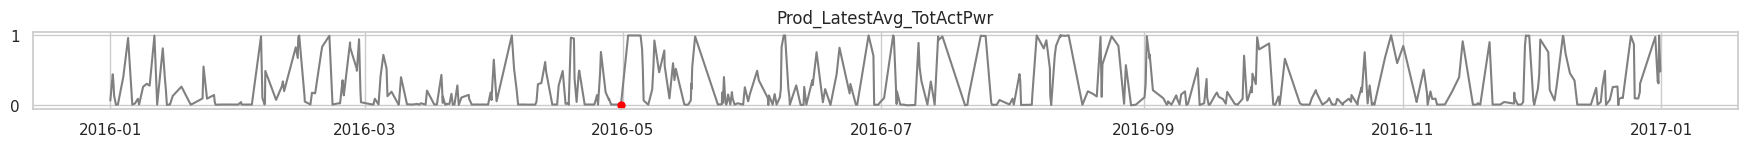

In [1715]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(trainhy[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

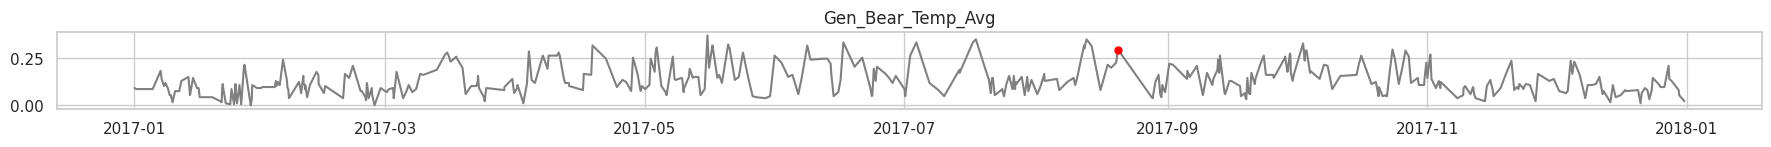

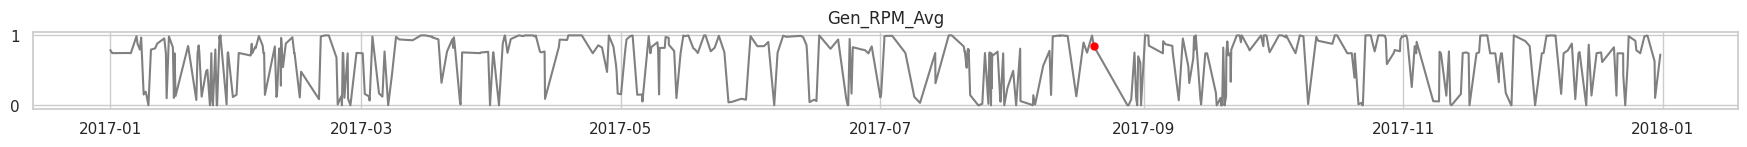

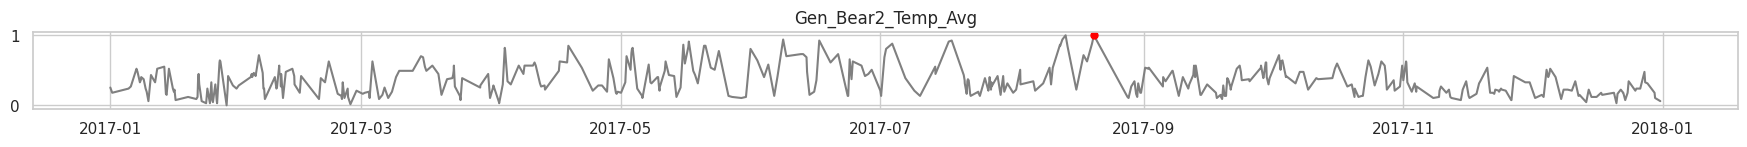

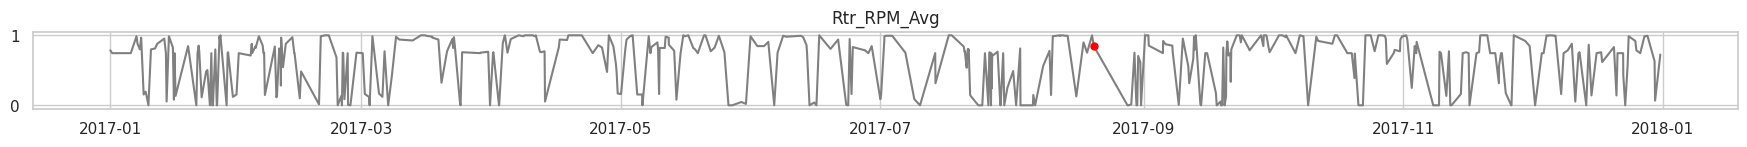

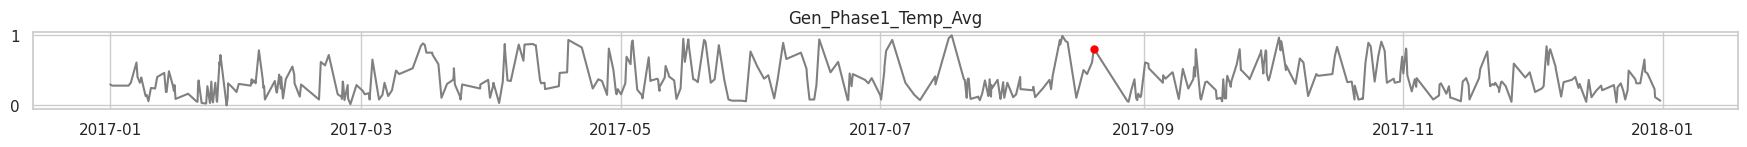

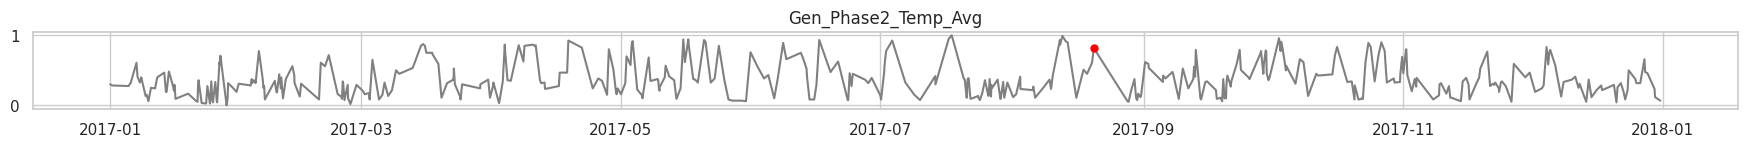

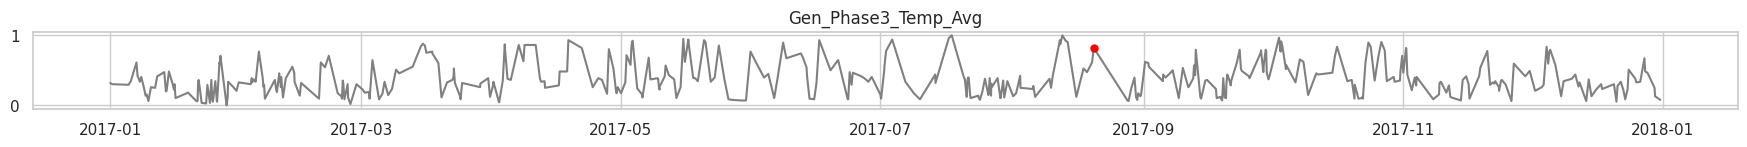

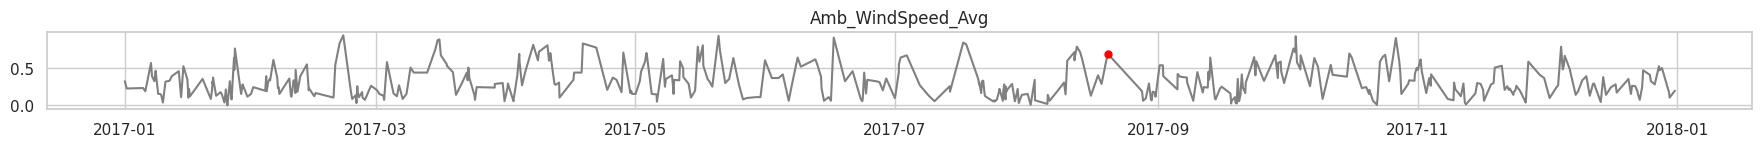

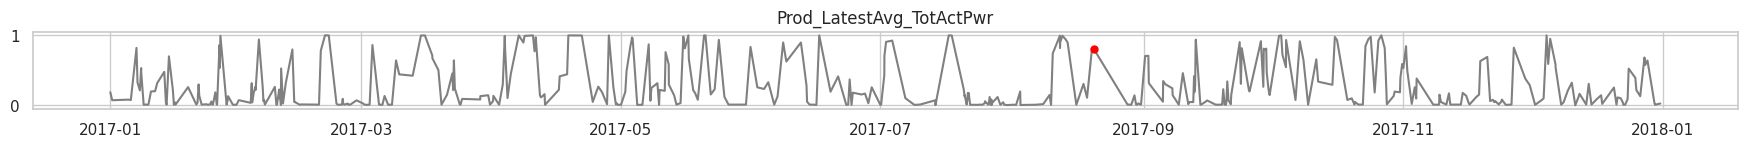

In [1716]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(testhy[sensor], color='grey')
    plot = plt.plot(broken_rows00[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

In [1717]:
train=trainhy.drop(columns=['fault'])
test=testhy.drop(columns=['fault'])

In [1718]:
scaler = preprocessing.MinMaxScaler()
# normalize the data

X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [1719]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (526, 1, 9)
Test data shape: (476, 1, 9)


In [1720]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [1721]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1, 9)]            0         
                                                                 
 lstm_72 (LSTM)              (None, 1, 16)             1664      
                                                                 
 lstm_73 (LSTM)              (None, 4)                 336       
                                                                 
 repeat_vector_18 (RepeatVe  (None, 1, 4)              0         
 ctor)                                                           
                                                                 
 lstm_74 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_75 (LSTM)              (None, 1, 16)             1344      
                                                          

In [1722]:
# fit the model to the data
nb_epochs = 50
batch_size = 5
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05).history

Epoch 1/50
100/100 [==============================] - 14s 13ms/step - loss: 0.3127 - val_loss: 0.2790
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1672 - val_loss: 0.1055
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0893 - val_loss: 0.0730
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0779 - val_loss: 0.0730
Epoch 5/50
 20/100 [=====>........................] - ETA: 0s - loss: 0.0729

KeyboardInterrupt: 

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
#plt.figure(figsize=(16,9), dpi=80)
#plt.title('Loss Distribution', fontsize=16)
#sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
#plt.xlim([0.0,.5])

In [ ]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 5 # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()

# Eşik değerini kullanarak anomalileri tespit edin
anomalies = scored[scored['Loss_mae'] > threshold_value]

# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")
print(f"Toplam anomalilerin sayısı: {len(anomalies)}")


In [ ]:
# calculate the loss on the test set
TRH=threshold_value
TRH2=TRH/1.5

X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = TRH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

In [ ]:
lossc=np.mean(np.abs(X_pred-Xtest), axis = 1)
lossc=pd.DataFrame(lossc)

lossc['ema']= lossc.rolling(60, min_periods=1).mean()
lossc['dtres']=lossc['ema']/2+TRH2
#lossc['dtres']=lossc['ema']+TRH
lossc

In [ ]:
scored0 = pd.DataFrame(index=test.index)
scored0['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored0['Threshold'] = lossc['dtres']
scored0['Anomaly'] = scored0['Loss_mae'] > scored0['Threshold']
scored0.head()

In [ ]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = TRH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [ ]:
scored0_train = pd.DataFrame(index=train.index)
scored0_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)

lossc1=np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
lossc1=pd.DataFrame(lossc1)

lossc1['ema']= lossc1.rolling(60, min_periods=1).mean()
#lossc1['dtres']=(lossc1[0]-lossc1['ema'])/2+TRH
lossc1['dtres']=lossc1['ema']/2+TRH2

scored0_train['Threshold'] = lossc1['dtres']
scored0_train['Anomaly'] = scored0_train['Loss_mae'] > scored0_train['Threshold']
scored0 = pd.concat([scored0_train, scored0])

In [ ]:
#broken_rows2=data_af['Fault']
broken_rows2 = trainhy['fault']
broken_rows2=pd.DataFrame(broken_rows2)
broken_rows2 = broken_rows2[broken_rows2['fault']==1]

broken_rows2

In [ ]:
broken_rows2['Loss_mae']=scored['Loss_mae']
broken_rows2['Threshold']=scored['Threshold']

In [ ]:
broken_rows20 = trainhy['fault']
broken_rows20=pd.DataFrame(broken_rows20)
broken_rows20 = broken_rows20[broken_rows20['fault']==1]
broken_rows20['Loss_mae']=scored0['Loss_mae']
broken_rows20['Threshold']=scored0['Threshold']

In [ ]:
broken_rows2=pd.DataFrame(broken_rows2)

broken_rows20=pd.DataFrame(broken_rows20)

In [ ]:
scored1=scored
scored10=scored0
broken_rows2=broken_rows2.sort_index()
broken_rows20=broken_rows20.sort_index()

In [ ]:
broken_rows2=broken_rows2[['Loss_mae','fault']]
broken_rows20=broken_rows20[['Loss_mae','fault']]

In [ ]:
scored1=pd.DataFrame(scored1)
scored10=pd.DataFrame(scored10)

scored11=scored1
scored110=scored10

In [ ]:
scored11['Anomaly'].replace(False,0, inplace=True)
scored11['Anomaly'].replace(True,1, inplace=True)

scored110['Anomaly'].replace(False,0, inplace=True)
scored110['Anomaly'].replace(True,1, inplace=True)

scored11

In [ ]:
scored1 = scored1.iloc[ :last_40percent, :]
scored10 =scored10.iloc[ :last_40percent, :]
scored10

In [ ]:
import plotly.express as px
fig = px.scatter(broken_rows2['Loss_mae'], title='anomali tespiti',color_discrete_sequence=['red'])
fig.add_trace(px.line(scored1).data[0])
fig.add_trace(px.line(scored1).data[1])
fig.add_trace(px.line(scored10).data[1])

fig.show()

In [ ]:
last_percent = round(len(scored) - len(scored)*perc)
sc_train = scored.iloc[ :last_percent, :]
sc_test= scored.iloc[last_percent: ,:]

sc_test

In [ ]:
last_percent = round(len(scored0) - len(scored0)*perc)
sc_train0 = scored0.iloc[ :last_percent, :]
sc_test0= scored0.iloc[last_percent: ,:]

sc_test0

In [ ]:
y_pred=sc_test['Anomaly']

tres=sc_test['Threshold']

y_true=testhy['fault']

lossm=sc_test['Loss_mae']

y_pred

In [ ]:
y_pred0=sc_test0['Anomaly']

tres0=sc_test0['Threshold']

y_true0=testhy['fault']

lossm0=sc_test0['Loss_mae']

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred1=y_pred['Anomaly'].replace(False, 0, inplace=True)
y_pred1=y_pred['Anomaly'].replace(True, 1, inplace=True)
y_pred0=pd.DataFrame(y_pred0)
y_pred10=y_pred0['Anomaly'].replace(False, 0, inplace=True)
y_pred10=y_pred0['Anomaly'].replace(True, 1, inplace=True)

y_true1=pd.DataFrame(y_true)
y_true2=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true1['loss']=lossm
y_true1= y_true1.reindex(columns=['loss', 'fault'])

broken_rows1 = y_true1[y_true1['fault']==1]
broken_rows1=broken_rows1.sort_index()

sc_test1=sc_test
sc_test1['Anomaly'].replace(False, 0, inplace=True)
sc_test1['Anomaly'].replace(True, 1, inplace=True)

In [ ]:
y_true10=pd.DataFrame(y_true)
y_true20=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true10['loss']=lossm
y_true10= y_true10.reindex(columns=['loss', 'fault'])

broken_rows10 = y_true10[y_true10['fault']==1]
broken_rows10=broken_rows10.sort_index()

sc_test10=sc_test0
sc_test10['Anomaly'].replace(False, 0, inplace=True)
sc_test10['Anomaly'].replace(True, 1, inplace=True)

In [ ]:
broken_rows1=pd.DataFrame(broken_rows1)
broken_rows10=pd.DataFrame(broken_rows10)


In [ ]:
sc_test10=pd.DataFrame(sc_test10)
sc_test10

In [ ]:
sc_test1=pd.DataFrame(sc_test1)
sc_test1

In [ ]:
import plotly.express as px





fig2 = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['red'])

fig2.add_trace(px.line(sc_test1).data[0])
fig2.add_trace(px.line(sc_test1).data[1])
fig2.add_trace(px.line(sc_test10).data[1])

fig2.data[-2].line.color = 'orange'
fig2.data[-1].line.color = 'green'
fig2.show()

In [ ]:
y_true2=pd.DataFrame(y_true2)


In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={'Anomaly': 'fault'}, inplace=True)
y_pred['fault'].replace(False,0, inplace=True)
y_pred['fault'].replace(True,1, inplace=True)

In [ ]:
y_pred0=pd.DataFrame(y_pred0)
y_pred0.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred0['Fault'].replace(False,0, inplace=True)
y_pred0['Fault'].replace(True,1, inplace=True)

In [ ]:
y_true2 = y_true2.to_numpy()
y_true20 = y_true20.to_numpy()
y_pred = y_pred.to_numpy()
y_pred0 = y_pred0.to_numpy()

In [ ]:
y_true2 = y_true2[:len(y_pred)]
y_true20 = y_true20[:len(y_pred0)]

In [ ]:
y_pred = np.pad(y_pred, (0, len(y_true2) - len(y_pred)), 'constant')
y_pred0 = np.pad(y_pred0, (0, len(y_true20) - len(y_pred0)), 'constant')


In [ ]:
# Confusion matrix hesapla
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp, = confusion_matrix(y_true2, y_pred).ravel()
tn0, fp0, fn0, tp0 =confusion_matrix(y_true20, y_pred0).ravel()
# PR ve FPR hesapla

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr0 = tp0 / (tp0 + fn0)
fpr0 = fp0 / (fp0 + tn0)

accuracy = np.mean(y_true2 == y_pred)
accuracy0 = np.mean(y_true20 == y_pred0)
# Sonuçları yazdır
print("Fix TPR (Sensitivity):", tpr)
print("Fix FPR (1-Specificity):", fpr)
print("Fix Accuracy:", accuracy)

In [ ]:
print("EMA TPR (Sensitivity):", tpr0)
print("EMA FPR (1-Specificity):", fpr0)
print("EMA Accuracy:", accuracy0)

In [ ]:
print(classification_report(y_true2, y_pred))

In [ ]:
print(classification_report(y_true20, y_pred0))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm = confusion_matrix(y_true2, y_pred)

# Görselleştir
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm0 = confusion_matrix(y_true20, y_pred0)

# Görselleştir
sns.heatmap(cm0, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()